<a href="https://colab.research.google.com/github/AbhishekKumar0313/Machine-Learning-/blob/main/nude_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
#count number of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('number of images in train dire',file_count)

number of images in train dire 815


In [ ]:
file_names=os.listdir('/content/train/')
print(file_names)

['nude 267.jpg', 'nude 50.jpg', 'nude 169.jpg', 'norm 154.jpg', 'nude 457.jpg', 'nude 477.jpg', 'norm 315.jpg', 'norm 155.jpg', 'nude 215.jpg', 'norm 140.jpg', 'norm 271.jpg', 'norm 193.jpg', 'nude 182.jpg', 'nude 447.jpg', 'norm 215.jpg', 'nude 105.jpg', 'norm 116.jpg', 'nude 350.jpg', 'norm 179.jpg', 'norm 173.jpg', 'nude 347.jpg', 'norm 231.jpg', 'nude 472.jpg', 'nude 385.jpg', 'nude 101.jpg', 'nude 140.jpg', 'nude 239.jpg', 'nude 439.jpg', 'nude 460.jpg', 'norm 97.jpg', 'nude 199.jpg', 'norm 95.jpg', 'norm 253.jpg', 'norm 301.jpg', 'nude 287.jpg', 'norm 16.jpg', 'nude 94.jpg', 'norm 143.jpg', 'norm 352.jpg', 'nude 269.jpg', 'nude 393.jpg', 'nude 282.jpg', 'nude 233.jpg', 'norm 141.jpg', 'nude 221.jpg', 'norm 293.jpg', 'norm 37.jpg', 'norm 304.jpg', 'nude 255.jpg', 'norm 2.jpg', 'norm 222.jpg', 'norm 256.jpg', 'nude 257.jpg', 'norm 25.jpg', 'norm 284.jpg', 'norm 190.jpg', 'norm 144.jpg', 'nude 478.jpg', 'nude 119.jpg', 'nude 186.jpg', 'nude 154.jpg', 'norm 323.jpg', 'nude 440.jpg', 

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

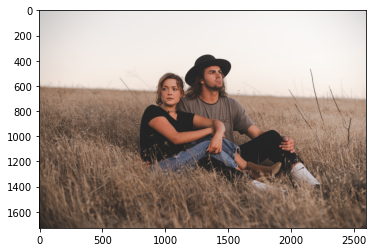

In [ ]:
img=mpimg.imread('/content/train/norm 297.jpg')
imgplt=plt.imshow(img)
plt.show()

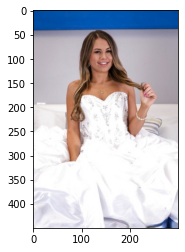

In [ ]:
img=mpimg.imread('/content/train/nude 91.jpg')
imgplt=plt.imshow(img)
plt.show()

In [ ]:
file_names=os.listdir('/content/train/')
for i in range(5):
  name=file_names[i]
  print(name[0:4])


nude
nude
nude
norm
nude


In [ ]:
file_names=os.listdir('/content/train/')
normal_count=0
nude_count=0
for img_file in file_names:
  name=img_file[0:4]
  if name=='norm':
    normal_count+=1
  else:
    nude_count+=1 

print("numbe of normal images ",normal_count)
print("number of nude images ",nude_count)

numbe of normal images  382
number of nude images  433


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import shutil
dir="image resized"
par="/content/"
path=os.path.join(par,dir)
shutil.rmtree(path)

In [ ]:
os.mkdir('/content/image resized')

In [ ]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(815):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename
  
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
import os
#count number of files in train folder
path,dirs,files=next(os.walk('/content/image resized'))
file_count=len(files)
print('number of images in image resized dire',file_count)

number of images in image resized dire 815


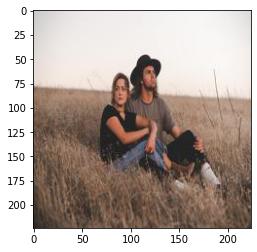

In [ ]:
img=mpimg.imread('/content/image resized/norm 297.jpg')
imgplt=plt.imshow(img)
plt.show()

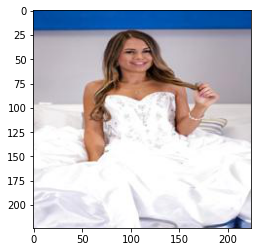

In [ ]:
img=mpimg.imread('/content/image resized/nude 91.jpg')
imgplt=plt.imshow(img)
plt.show()

In [ ]:
# creating a for loop to assign labels
filenames=os.listdir('/content/image resized/')
labels=[]

for i in range(815):
  file_name=filenames[i]
  label=file_name[0:4]

  if label=="norm":
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(filenames[0:10])
print(len(labels))

['nude 267.jpg', 'nude 50.jpg', 'nude 169.jpg', 'norm 154.jpg', 'nude 457.jpg', 'nude 477.jpg', 'norm 315.jpg', 'norm 155.jpg', 'nude 215.jpg', 'norm 140.jpg']
815


In [ ]:
print(labels[0:10])
print(len(labels))

[0, 0, 0, 1, 0, 0, 1, 1, 0, 1]
815


In [ ]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[433 382]


In [ ]:
import os
#count number of files in train folder
path,dirs,files=next(os.walk('/content/image resized'))
file_count=len(files)
print('number of images in train dire',file_count)

number of images in train dire 815


In [ ]:
import cv2
import glob

In [ ]:
image_directory="/content/image resized/"
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+'*'+e))for e in image_extension]
nude_norm_images=np.asarray([cv2.imread(file)for file in files])

In [ ]:
nude_norm_images

array([[[[240, 252, 252],
         [240, 252, 252],
         [240, 253, 255],
         ...,
         [169, 163, 156],
         [187, 182, 173],
         [221, 216, 207]],

        [[240, 252, 252],
         [240, 252, 252],
         [240, 253, 255],
         ...,
         [143, 137, 130],
         [153, 148, 139],
         [207, 202, 193]],

        [[240, 252, 252],
         [240, 252, 252],
         [240, 253, 255],
         ...,
         [164, 158, 151],
         [160, 155, 146],
         [155, 150, 141]],

        ...,

        [[151, 165, 187],
         [150, 164, 186],
         [149, 163, 185],
         ...,
         [ 64,  72,  89],
         [ 74,  82,  99],
         [101, 109, 126]],

        [[149, 163, 185],
         [149, 163, 185],
         [148, 162, 184],
         ...,
         [ 72,  80,  97],
         [ 84,  92, 109],
         [102, 110, 127]],

        [[149, 163, 185],
         [149, 163, 185],
         [148, 162, 184],
         ...,
         [ 82,  90, 107],
        

In [ ]:
type(nude_norm_images)

numpy.ndarray

In [ ]:
print(nude_norm_images.shape)

(815, 224, 224, 3)


In [ ]:
x=nude_norm_images
y=np.asarray(labels)

In [ ]:
print(x.shape)
print(y.shape)

(815, 224, 224, 3)
(815,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(815, 224, 224, 3) (733, 224, 224, 3) (82, 224, 224, 3)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(815,) (733,) (82,)


In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
print(x_train_scaled)

[[[[0.97254902 1.         0.98039216]
   [0.97254902 1.         0.98039216]
   [0.97254902 1.         0.98039216]
   ...
   [0.2627451  0.2745098  0.30588235]
   [0.25882353 0.27058824 0.30196078]
   [0.25882353 0.27058824 0.30196078]]

  [[0.97254902 1.         0.98039216]
   [0.97254902 1.         0.98039216]
   [0.97254902 1.         0.98039216]
   ...
   [0.27058824 0.28235294 0.31372549]
   [0.26666667 0.27843137 0.30980392]
   [0.26666667 0.27843137 0.30980392]]

  [[0.97254902 1.         0.98039216]
   [0.97254902 1.         0.98039216]
   [0.97254902 1.         0.98039216]
   ...
   [0.26666667 0.27843137 0.30980392]
   [0.2627451  0.2745098  0.30588235]
   [0.2627451  0.2745098  0.30588235]]

  ...

  [[0.36470588 0.47843137 0.56078431]
   [0.31764706 0.43137255 0.51372549]
   [0.29803922 0.40392157 0.48627451]
   ...
   [0.4        0.44705882 0.47058824]
   [0.38039216 0.42745098 0.45098039]
   [0.37647059 0.42352941 0.44705882]]

  [[0.41568627 0.53333333 0.60784314]
   [0.3

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
num_of_classes=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
23/23 [==============================] - 26s 886ms/step - loss: 0.5263 - acc: 0.7503
Epoch 2/5
23/23 [==============================] - 20s 855ms/step - loss: 0.2646 - acc: 0.9045
Epoch 3/5
23/23 [==============================] - 20s 851ms/step - loss: 0.1960 - acc: 0.9441
Epoch 4/5
23/23 [==============================] - 20s 854ms/step - loss: 0.1657 - acc: 0.9441
Epoch 5/5
23/23 [==============================] - 19s 845ms/step - loss: 0.1426 - acc: 0.9550


In [ ]:
score,acc=model.evaluate(x_test_scaled,y_test)
print("Test Score = ",score)
print("Test accuracy = ",acc)

3/3 [==============================] - 2s 687ms/step - loss: 0.3151 - acc: 0.8537
Test Score =  0.31505751609802246
Test accuracy =  0.8536585569381714


path of the image to be predicted/content/download.jpeg


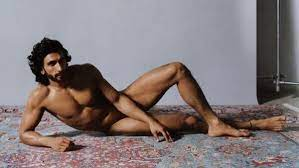

1/1 [==============================] - 0s 55ms/step
[[ 3.009988  -0.8660131]]
[[ 3.009988  -0.8660131]]
Then image is a nude


In [ ]:
input_image_path=input('path of the image to be predicted')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_prediction)
if input_pred_label==0:
  print("Then image is a nude")
else:
  print("The image is a normal")

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('nude_classifier.pkl','wb'))